# **Sustainable Development Goals (SDGs) Classifier**

![](https://www.idsa.in/system/files/sdg-un-banner.jpg)

# <a id="contents">Table of Contents</a><br>
1. [**Introduction**](#introduction)
  > 1.1 [**Problem Statement**](#problem_statement) <br>
    1.2 [**Project Objectives**](#project_objective) <br>
    1.3 [**Definition of Data Features**](#data)<br>
    1.4 [**Importing Libraries**](#importing_libraries)<br>
    1.5 [**Loading Data**](#loading_data) <br>
    1.6 [**Initialize Comet**](#comet) <br>
    
2. [**Data Preprocessing**](#preprocessing)
>   2.1 [**Cumulative Probability Over Agreement Scores**](#cumulative)<br>
    2.2 [**Removing Links**](#removing_links)<br>


3. [**Exploratory Data Analysis**](#EDA) <br>
>   3.1 [**Most Frequent Words**](#most_frequent_words)<br>
    3.2 [**Visualisation**](#visualisation)<br>
    3.3 [**Countries Involved in Sustainable Development Goals (SDG)**](#countries)<br>
    3.4 [**Text Analysis**](#text_analysis)<br>
    3.5 [**Class Balance**](#class_balance)<br>
    3.6 [**Feature Engineering**](#feature_engineering)<br>
   
4. [**Classification Models**](#model) <br>
>   4.1 [**Defining the Independent (X) and Dependent Variables (y)**](#def_variables) <br> 
    4.2 [**Model Preprocessing**](#modelpreprocessing) <br>
    4.3 [**Building Models**](#buildingmodels) <br>
      >>4.3.1 [**Logistic Regression Classifier**](#lrc) <br>
      4.3.2 [**Decision Tree Classifier**](#dtc) <br>
      4.3.3 [**Naive Bayes Classifier**](#nbc) <br> 
      4.3.4 [**K-Neighbors Classifier**](#knc) <br>
      4.3.5 [**5**](#knc) <br>
      
  >   4.4 [**Model Performance**](#modelperformance) <br>
        
5. [**Conclusion and Recommendation**](#Conclusion/Recommendation) <br>
   > 5.1 [**Conclusion**](#Conclusion) <br>
     5.2 [**Recommendation**](#Recommendation) <br><br>

6. [**References**](#reference) <br>



# 1 <a id="introduction"><strong>INTRODUCTION</strong></a>
[Table of Contents](#contents)<br>

The Sustainable Development Goals (SDGs) were established in 2015 as a blueprint for peace and prosperity for people and the planet, now and into the future. The SDGs must be monitored in order to gauge development and challenges to achieving such common objectives. Teams from the United Nations evaluate streams of SDG-related papers created by governments, academia, business, and public bodies to determine how well each SDG is progressing.
Although UNEP has experts in many domains that can help in evaluating streams of SDG-related papers, connections to the SDGs outside of their areas of expertise may be missed.
so for that reason we , members of team A have been tasked to build an NLP module that would help identify SDGs based on articles fed to the module


## 1.1 <a id="problem_statement"><strong>Problem Statement</strong></a>
[Table of Contents](#contents)<br>

>* Nation teams use documents produced by governments, academia, private and public entities in the monitoring of SDGs.<br>
>* It is a time-consuming exercise for Experts to read the documents and identify which SDGs are mentioned, or are related to it.<br> 
>* UNEP has experts in many fields, links to the SDGs that are outside their expertise may be overlooked.<br>
>* It is essential to assess progress and obstacles to realise such shared goals . 


## 1.2 <a id="project_objective"><strong>Project Objectives</strong></a>
[Table of Contents](#contents)<br>

>* Clean the dataset so that it may be utilized for model development.
>* Create a variety of models to identify the various SDGs.
>* Using the provided Test Data, assess the model's accuracy in making predictions.
>* Pick the best model for categorizing SDG articles.

## 1.3 <a id="data"><strong>Definition of Data Features</strong></a>
[Table of Contents](#contents)<br>

#### I. Data Source
The Sustainable Development Goals (SDGs) Community Dataset (OSDG-CD) is the end product of hundreds of volunteers' efforts on the OSDG Community Platform to advance our understanding of the SDGs (OSDG-CP). It includes hundreds of text snippets that community volunteers labeled with regard to the SDGs.

#### I. Goal Description
1. End poverty in all its forms everywhere
2. End hunger, achieve food security and improved nutrition and promote sustainable agriculture
3. Ensure healthy lives and promote well-being for all at all ages
4. Ensure inclusive and equitable quality education and promote lifelong learning opportunities for all
5. Achieve gender equality and empower all women and girls
6. Ensure availability and sustainable management of water and sanitation for all
7. Ensure access to affordable, reliable, sustainable and modern energy for all
8. Promote sustained, inclusive and sustainable economic growth, full and productive employment and decent work for all
9. Build resilient infrastructure, promote inclusive and sustainable industrialization and foster innovation
10. Reduce inequality within and among countries
11. Make cities and human settlements inclusive, safe, resilient and sustainable
12. Ensure sustainable consumption and production patterns
13. Take urgent action to combat Sustainable Development Goals (SDG) and its impacts
14. Conserve and sustainably use the oceans, seas and marine resources for sustainable development
15. Protect, restore and promote sustainable use of terrestrial ecosystems, sustainably manage forests, combat desertification, and halt and reverse land degradation and halt biodiversity loss




#### II. Column Definitions
The OSDG-CD dataset is provided in a .csv format. It is a flat tabular dataset that contains the following columns:

>* doi : Digital Object Identifier of the original document
>* text_id : unique text identifier;
>* text : text excerpt from the document;
>* sdg : the SDG the text is validated against;
>* labels_negative : the number of volunteers who rejected the suggested SDG label;
>* labels_positive : the number of volunteers who accepted the suggested SDG label;
>* agreement : agreement score based on the formula described <a href="https://github.com/osdg-ai/osdg-data"> Here</a>

 ## 1.4  <a id="importing_libraries"><strong>Importing Libraries</strong></a>
[Table of Contents](#contents)<br>

In [119]:
# Import basic and fundamental libraries
import numpy as np
import scipy.stats as stats
import pandas as pd
import string
import re
import pickle
import pycountry

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from wordcloud import WordCloud, ImageColorGenerator

# Import libraries for NLP
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import SnowballStemmer, PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# Import utility libraries from scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, GridSearchCV

# Import modeling libraries from scikit-learn
import sklearn.ensemble as ensemble
import sklearn.linear_model as linear_model
import sklearn.naive_bayes as naive_bayes
import sklearn.neighbors as neighbors
import sklearn.svm as svm
import sklearn.tree as tree

# Other library imports
import en_core_web_sm
import spacy
from collections import Counter
from textwrap import wrap

# Import model evaluation metrics from scikit-learn
import sklearn.metrics as metrics

# Enable interactive visualizations in Jupyter
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Suppress unwarranted warnings
import warnings
warnings.filterwarnings("ignore")


## 1.5 <a id="loading_data"><strong>Loading Data</strong></a>
To begin importing our data, we will first ensure that both the raw data and notebook file are located in the same directory on our local system. We can then use the following code to load the training data sets into our notebook. If the files are not located in the same directory, we will need to specify the file path on our machine. It is good practice to view the loaded data after it has been imported to ensure it has been properly loaded. The data will be saved in two separate data frames, one for training and testing and the other for exploratory data analysis.

[Table of Contents](#contents)

In [120]:
# Load train data into dataframes
train = pd.read_csv('data/train.csv')
test = pd.read_csv("data/test.csv")

# Check that data has been properly loaded
train.head()
test.head()


,doi,text_id,text,labels_negative,labels_positive,agreement,id
0,10.1787/9789264204256-4-en,eb6faaeb2810029e3a2b9edf4b3d80e8,Nearly 3 out of 10 adults in these countries p...,1,4,0.6,1
1,10.1787/9789264167865-7-en,fa7fa2ce7b03d60101073df216c05713,As urban areas become denser and rely more on ...,0,4,1.0,2
2,10.18356/ab2e0473-en,fa8afb153838b92b0e9d78b375689fde,Women who work outside their homes need to pro...,0,9,1.0,3
3,10.18356/faf8a648-en,e86113bf51a0aed83b8d3e3ad0bf385d,The key governance bodies of this systemic res...,3,3,0.0,4
4,10.18356/f3e7d816-en,34a60596f64e0723734228a27440a9e9,"In terms of policies, the change of focus from...",0,3,1.0,5


<a id=three2></a>

#### 1.5.2 <strong>Check the "Shape" of the data-sets</strong></a>
The shape of both datasets indicates that the data has been divided into two sets. The shape also shows that the training dataset has eight columns, while the test dataset has seven. Our model is designed to predict the missing column in the test dataset, which can be identified as the "SDG" column after examining both datasets. By looking for the absent column in the test dataset, we can determine which column our model is intended to forecast.

In [121]:
# Check shape of train and test dataframes
print(train.shape)
print(test.shape)

# Check column names of train and test dataframes
print(train.columns)
print(test.columns)

(25944, 8)
(6487, 7)
Index(['doi', 'text_id', 'text', 'sdg', 'labels_negative', 'labels_positive',
       'agreement', 'id'],
      dtype='object')
Index(['doi', 'text_id', 'text', 'labels_negative', 'labels_positive',
       'agreement', 'id'],
      dtype='object')


<a id=four1></a>

#### 1.5.3 <strong>Dataset summary</strong></a>

It is important to identify the columns that have null entries as null values can affect the performance of our model. The "isnull" function shows the number of null values that are contained in each column of the dataset. This data set is relatively clean 
Pandas dataframe.info() function is used to get a concise summary of the dataframe

In [122]:
df_train = train
df_test = test

In [123]:
def summary(df):
    """
    Prints summary information and number of missing values for each column in the given dataframe.
    
    Parameters:
    df (pandas.DataFrame): The dataframe to summarize.
    """
    # Print summary information
    print(df.info())
    
    # Print number of missing values for each column
    print("\nMissing values:")
    print(df.isna().sum())


In [124]:
# Print summary information and missing values for train dataframe
summary(df_train)

# Print summary information and missing values for test dataframe
summary(df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25944 entries, 0 to 25943
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doi              25944 non-null  object 
 1   text_id          25944 non-null  object 
 2   text             25944 non-null  object 
 3   sdg              25944 non-null  int64  
 4   labels_negative  25944 non-null  int64  
 5   labels_positive  25944 non-null  int64  
 6   agreement        25944 non-null  float64
 7   id               25944 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 1.6+ MB
None

Missing values:
doi                0
text_id            0
text               0
sdg                0
labels_negative    0
labels_positive    0
agreement          0
id                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6487 entries, 0 to 6486
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------    

## 1.6 <a id="comet"><strong>Initialize Comet</strong></a>
[Table of Contents](#contents)

In [125]:
#importing comet for tracking
from comet_ml import Experiment

In [126]:
# Setting the API key (saved as environment variable)
#initialize experiment for Comet
experiment = Experiment(
    api_key="bEFY9Hn1QccermEDT6aTyQMOA",
    project_name="sustainable-development-goals-sdgs-classifier",
    workspace="kojosbk",
)


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: tensorboard, keras, torch, sklearn, tensorflow. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/kojosbk/sustainable-development-goals-sdgs-classifier/766ad25d19d6403ba8847ba0f3907187
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1.36 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET WAR

# 2 <a id="preprocessing"><strong>DATA PREPROCESSING</strong></a>
[Table of Contents](#contents)

In this phase, we'll proab into  the data, as well as filter out the most relevant information..
 
## 2.1 <a id="cumulative"><strong>Cumulative Probability Over Agreement Scores</strong></a>
[Table of Contents](#contents)


In [127]:
# Calculate cumulative probability of agreement scores
train_lambda = df_train['agreement'].value_counts(normalize=True).sort_index().cumsum().to_frame(name='p_sum')
train_lambda.reset_index(inplace=True)
train_lambda.rename({'index': 'agreement'}, axis=1, inplace=True)

print('Shape:', train_lambda.shape)
display(train_lambda.head())

Shape: (40, 2)


,agreement,p_sum
0,0.000000,0.023936
1,0.053719,0.023975
2,0.075180,0.024013
3,0.090909,0.024283
4,0.111111,0.074237


In [128]:
# Visualize cumulative probability of agreement scores
fig = px.line(
    data_frame=train_lambda,
    x='agreement',
    y='p_sum',
    markers=True,
    labels={
        'agreement': 'Agreement Score',
        'p_sum': 'Cumulative Probability'
    },
    color_discrete_sequence=['#1f77b4'],
    title='Figure 1. Cumulative Distribution Function of the Agreement Score'
)

fig.update_traces(hovertemplate='Agreement score: %{x:.2f}<br>Cumulative probability: %{y:.2f}')
fig.update_layout(
    xaxis={'dtick': 0.1},
    yaxis={'dtick': 0.25}
)
fig.show()


In [129]:
def sdg_selector(df):
    """
    Filters rows of a Pandas DataFrame based on the values in the 'agreement' and 'labels_positive' columns.
    Only keeps rows where 'agreement' is at least 0.94 and 'labels_positive' is greater than 'labels_negative'.
    
    Parameters:
    df (pandas.DataFrame): The dataframe to filter.
    """
    print('Shape before:', df.shape)
    df = df.query('agreement >= 0.94 and labels_positive > labels_negative').copy()
    print('Shape after :', df.shape)
    
# Apply function to train data
sdg_selector(df_train)


Shape before: (25944, 8)
Shape after : (10370, 8)


In [130]:
# Create dataframe showing distribution of texts (agreement > 0.94) across SDGs
train_lambda = df_train.query('agreement >= 0.94').groupby('sdg', as_index=False).agg(count=('text_id', 'count'))
train_lambda['share'] = train_lambda['count'].divide(train_lambda['count'].sum()).multiply(100)
print('Shape:', train_lambda.shape)
display(train_lambda.head())


Shape: (15, 3)


,sdg,count,share
0,1,685,6.221617
1,2,535,4.859219
2,3,1199,10.890100
3,4,1390,12.624886
4,5,1512,13.732970


In [131]:
# Plot bar chart of distribution of texts (agreement > 0.6) across SDGs
fig = px.bar(
    data_frame=df_train.query('agreement >= 0.6').groupby('sdg', as_index=False).agg(count=('text_id', 'count')),
    x='sdg',
    y='count',
    labels={
        'sdg': 'SDG',
        'count': 'Count'
    },
    color_discrete_sequence=['#1f77b4'],
    title='Figure 2. Distribution of Texts (Agreement > 0.6) over SDGs'
)

fig.update_traces(hovertemplate='SDG %{x}<br>Count: %{y}')
fig.update_layout(xaxis={'type': 'category'})
fig.show()


#### Due to the presence of a non numerical column in our datasets, some preprocessing processes must be performed, including:


>* letter casing :Converting all letters to upper case or lower case is called letter casing.
>* Tokenization :Tokenizing refers to the process of converting texts to tokens. Words separated by spaces in a text are referred to as tokens.
>* Noise removal: Unwanted characters such as HTML tags, punctuation marks, special characters, white spaces, and so on are removed.
>* Stopwords should be removed because they don't contribute anything to the machine learning model. The nltk library can specify a list of stopwords, or it can be tailored to a particular company.
>* Lemmatization: the process of reducing a word's several forms to a single form, such as converting "builds," "building," or "built" to the lemma.

---

## 2.2 <a id="removing_links"><strong>Cleaning the data</strong></a>
[Table of Contents](#contents)

In [132]:
#removing links
train['text'] = train['text'].str.replace('http\S+|www.\S+', '', case=False)
train['text'] = train['text'].str.replace(r's*https?://S+(s+|$)', ' ',case=False).str.strip()
test['text'] = test['text'].str.replace('http\S+|www.\S+', '', case=False)
test['text'] = test['text'].str.replace(r's*https?://S+(s+|$)', ' ',case=False).str.strip()

In [133]:
def preprocess(text):
    """
    This function takes in a string of text, removes URL hyperlinks, stopwords,
    punctuation noises, contractions, and lemmatizes the text. It returns a list
    of lemmatized and cleaned words.
    """
    # Initialize tokenizer and lemmatizer
    tokenizer = TreebankWordTokenizer()
    lemmatizer = WordNetLemmatizer()
    stopwords_list = stopwords.words("english")
    point_noise = string.punctuation + "0123456789"

    # Remove @mentions, '#' symbols, and "RT" from text
    clean_text = re.sub(r"@[a-zA-Z0-9\_\w]+", "", text)
    clean_text = re.sub(r"#[a-zA-Z0-9]+", "", clean_text)
    clean_text = re.sub(r"RT", "", clean_text)

    # Expand contractions
    clean_text = re.sub(r"won\'t", "will not", clean_text)
    clean_text = re.sub(r"can\'t", "can not", clean_text)
    clean_text = re.sub(r"also", "", clean_text)
    clean_text = re.sub(r"n\'t", " not", clean_text)
    clean_text = re.sub(r"\'re", " are", clean_text)
    clean_text = re.sub(r"\'s", " is", clean_text)
    clean_text = re.sub(r"\'d", " would", clean_text)
    clean_text = re.sub(r"\'ll", " will", clean_text)
    clean_text = re.sub(r"\'t", " not", clean_text)
    clean_text = re.sub(r"\'ve", " have", clean_text)
    clean_text = re.sub(r"\'m", " am", clean_text)

    # Remove punctuations and numbers
    clean_text = "".join(word for word in clean_text if word not in point_noise)

    # Lowercase text
    clean_text = clean_text.lower()

    # Remove non-ASCII characters
    clean_text = "".join(word for word in clean_text if ord(word) < 128)

    # Tokenize text
    tokens = tokenizer.tokenize(clean_text)

    # Lemmatize and remove stopwords
    lemmas = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_list]

    # Remove words with length less than 2
    clean_words = [word for word in lemmas if len(word) >= 2]

    return clean_words


In [134]:
# Count the number of words in each message
train["Num Words"] = train["text"].apply(lambda s: len(s.split(" ")))

In [135]:
# Apply the preprocess function to the text columns in both the train and test data
train["text"] = train["text"].apply(preprocess)
test["text"] = test["text"].apply(preprocess)


In [136]:
#Viewing cleaned data
train.head()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id,Num Words
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,"[indicator, target, data, available, globally,...",9,4,5,0.111111,1,86
1,10.18356/5950d914-en,b6415a528064b85fdde4b4c61239ed3a,"[manufacturing, value, added, percentage, gdp,...",9,0,3,1.000000,2,119
2,10.18356/31959a6d-en,29127def7e81b999b87c8e887a4fe882,"[share, share, question, volume, gender, polit...",5,2,7,0.555556,3,54
3,10.1787/eco/surveys-cze-2014-6-en,459db322b9e44630320fda76783e0f69,"[parent, work, without, losing, entitlement, p...",4,2,2,0.000000,4,100
4,10.1787/9789264119536-11-en,8b7d8c6c605fe9695d08ab03d601e0e9,"[question, considerable, policy, relevance, ex...",10,1,4,0.600000,5,112


# 3 <a id="EDA"><strong>EXPLORATORY DATA ANALYSIS</strong></a>

 We'll use a range of strategies in this part to maximize specific insights into our dataset, uncover underlying structure, extract relevant Information, find outliers and anomalies, and establish the optimum estimation parameters. In other words, we want to go deeper into our dataset in order to learn more about its behavior!

[Table of Contents](#contents)

## 3.2 <a id="visualisation of the Relivant Sdg text data"><strong>Visualisation of the Relivant Sdg text data</strong></a>
[Table of Contents](#contents)

* Separate Datframes of Text for each SDG 

In [137]:
# Print the distribution of messages per SDG
print("See distribution of messages per SDG:")
count = train.groupby("sdg").count()["text"].reset_index().sort_values(by="text", ascending=False)
count.style.background_gradient(cmap="Purples")


See distribution of messages per SDG:


,sdg,text
4,5,3438
3,4,2999
6,7,2473
5,6,2247
0,1,2190
2,3,2132
1,2,1963
10,11,1798
12,13,1695
7,8,1218


In [138]:
def map_sdg_labels(df):
    """Map the target variable names to their code for better understanding."""
    sdg_labels = {
        1: "No poverty",
        2: "Zero Hunger",
        3: "Good Health and well-being",
        4: "Quality Education",
        5: "Gender equality",
        6: "Clean water and sanitation",
        7: "Affordable and clean energy",
        8: "Decent work and economic growth",
        9: "Industry, Innovation and Infrustructure",
        10: "Reduced Inequality",
        11: "Sustainable cites and communities",
        12: "Responsible consumption and production",
        13: "Climate Action",
        14: "Life below water",
        15: "Life on land",
        16: "Peace , Justice and strong institutions",
        17: "Partnership for the goals",
    }
    df["SDG Labels"] = df["sdg"].map(sdg_labels)

# Map the target variable names to their code
map_sdg_labels(train)

# Confirm the dataset
train.head(1)



,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id,Num Words,SDG Labels
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,"[indicator, target, data, available, globally,...",9,4,5,0.111111,1,86,"Industry, Innovation and Infrustructure"


In [139]:
# Print the distribution of messages per SDG label
print("See distribution of messages per SDG:")
count = train.groupby("SDG Labels").count()["text"].reset_index().sort_values(by="text", ascending=False)
count.style.background_gradient(cmap="Purples")


See distribution of messages per SDG:


,SDG Labels,text
4,Gender equality,3438
10,Quality Education,2999
0,Affordable and clean energy,2473
1,Clean water and sanitation,2247
9,No poverty,2190
5,Good Health and well-being,2132
14,Zero Hunger,1963
13,Sustainable cites and communities,1798
2,Climate Action,1695
3,Decent work and economic growth,1218


In [140]:
# Create a bar plot of the SDG labels and text data
fig = px.bar(
    count,
    x="SDG Labels",
    y="text",
    color="text",
    title="Top SDG in the Text column",
    template="plotly_white",
    labels={"ngram": "Bigram", "count": "text"},
).update_xaxes(categoryorder="total ascending")
fig.show()


### Observations

>* It can be clearly seen that __Gender equality__ has the most text of all the SDGs. This means that more Documents have been written and published on gender equality, suggesting that Gender Equality is a pressing issue.
>* This is closely followed by Quality Education and Affordable and Clean Energy.
>* At the other end, Responsible consumption and production has the least number of text, implying that it is the least documented and researched SDG.
>. Also, Life on land, Reduced Inequality, Industry, Innovation and Infrastructure, and Life below water all have less than 1000 text. These are all important part of the SDGs but less documents have been written on them
>*  Gender equality,quality education and affordable and clean energy has the highest number of text.
>*  Responsible consumption and production has the lowest number of text.
>*  A glance look at the data gives an overview of how the text data is distributed among the various SDGs

## 3.3 <a id="countries"><strong>Countries Involved in Sustainable Development Goals (SDG)</strong></a>
[Table of Contents](#contents)

As part of our exploration, we sought to identify the countries involved in the Sustainable Development Goals (SDGs) from our text data. To do this, we defined a list of countries and used the cleaning_country function to extract the countries mentioned in the texts. We then used the country_plot function to create a plot visualizing the frequency with which these countries appeared in relation to a given SDG. This allowed us to gain insight into the countries that are actively participating in the pursuit of the SDGs.

In [141]:
# Create a map of SDG labels to their corresponding codes
sdg_map = {
    "No poverty": 1,
    "Zero Hunger": 2,
    "Good Health and well-being": 3,
    "Quality Education": 4,
    "Gender equality": 5,
    "Clean water and sanitation": 6,
    "Affordable and clean energy": 7,
    "Industry, Innovation and Infrustructure": 9,
    "Decent work and economic growth": 8,
    "Reduced Inequality": 10,
    "Climate Action": 13,
    "Sustainable cites and communities": 11,
    "Responsible consumption and production": 12,
    "Life below water": 14,
    "Life on land": 15,
}

# Make a copy of the train data
train_train = train.copy()

# Convert the 'text' column from a list of words to a single string
train_train["text"] = train_train["text"].apply(lambda x: " ".join([str(i) for i in x]))


In [142]:
# Create a list of country names
country_list = []
for country in pycountry.countries:
    country_list.append(country.name)


In [143]:
# Convert the country names to lowercase
country_list = [country.lower() for country in country_list]


In [144]:
def extract_country(text: str) -> str:
    """
    Extract a country from the text and return it.
    """
    # Remove punctuation and split the text into words
    rem_punct = re.sub(r"[^a-zA-Z ]", "", text)
    word_split = rem_punct.lower().split()

    # Create a set of country names and extract a country from the text
    country_set = set(country_list)
    country_ext = " ".join([t for t in word_split if t in country_set])

    return country_ext


# Extract the country from the 'text' column in the train_train DataFrame
train_train["country"] = train_train["text"].apply(extract_country)


In [145]:
def plot_countries_by_sdg(sdg_map: dict):
    """
    Plot a bar chart of the frequency of countries involved in Sustainable Development Goals (SDG) for each SDG.
    """
    # Create a slider widget to select the number of countries to display
    slider = widgets.IntSlider(value=10, min=1, max=20, step=1)

    @interact_manual
    def select(frequency=slider, sdg=sdg_map.keys()):
        # Select the 'country' column for the selected SDG
        country_sdg = train_train[train_train["sdg"] == sdg_map[sdg]]["country"]

        # Count the frequency of each country and select the top N countries
        train = country_sdg.value_counts().to_frame().iloc[1:frequency]

        # Create a bar chart of the frequency of each country
        fig = px.bar(
            train,
            x=train.index,
            y="country",
            labels={"index": "Country", "country": "Count"},
            title=f"Bar chart of countries contributing to the {sdg} SDG",
        )
        fig.show()



In [146]:
plot_countries_by_sdg(sdg_map)

interactive(children=(IntSlider(value=10, description='frequency', max=20, min=1), Dropdown(description='sdg',…

### Observations

>* The following countries are heavly involved in the SDGs assigned to them
>>*  SDG 1: Brazil & India
>>*  SDG 2: Kazakhstan & Brazil
>>*  SDG 3: Sweden & Australia
>>*  SDG 4: Malaysia & Chile
>>*  SDG 5: Mexico & Slovakia
>>*  SDG 6: China & India
>>*  SDG 7: Poland & China
>>*  SDG 8: Japan & China
>>*  SDG 9: China & Brazil
>>*  SDG 10: Ethiopia & Australia
>>*  SDG 11: Kazakhstan & Mexico
>>*  SDG 12: Jamaica & Japan
>>*  SDG 13: Norway & Canada
>>*  SDG 14: Brazil & Poland
>>*  SDG 15: Jamaca & Japan

## 3.4 <a id="text_analysis"><strong>Text Analysis</strong></a>
[Table of Contents](#contents)

* Separate Datframes of Text for each SDG 


From here, we'll delve further into our text, looking into each term and its frequency of occurrence individually.

#### 3.4.1 <a id="most_frequent_words"><strong>Most Frequent Words</strong></a>
[Table of Contents](#contents)

In [147]:
from collections import Counter
from typing import List, Tuple

def find_most_frequent_words(train: pd.DataFrame) -> List[Tuple[str, int]]:
    """
    Find the most frequently used words in the 'text' column of the train DataFrame.
    """
    # Create a counter to count the frequency of each word
    cnt = Counter()
    for message in train["text"].values:
        for word in message:
            cnt[word] += 1
    
    # Return the 5 most frequent words
    return cnt.most_common(5)

# Find the most frequent words in the train data
most_frequent_words = find_most_frequent_words(train)


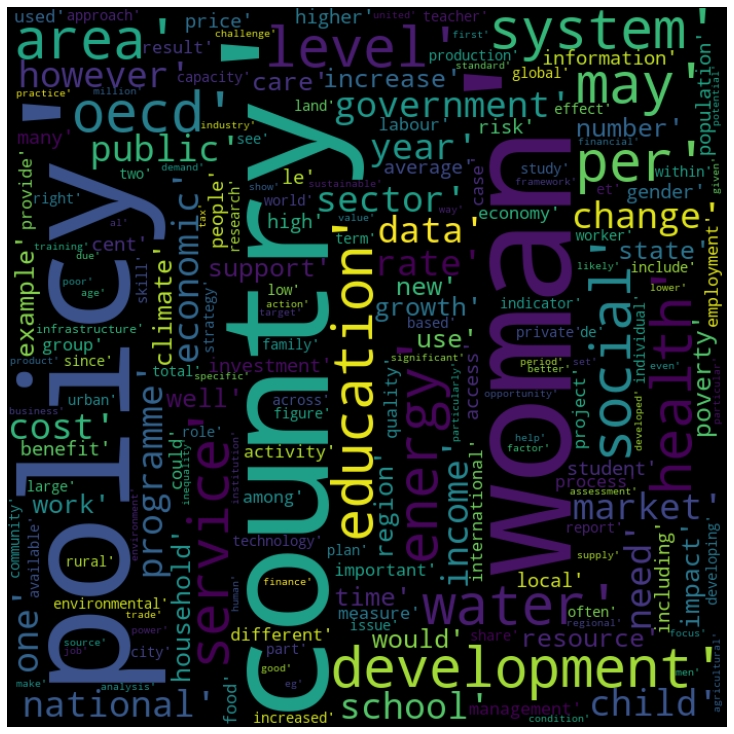

In [148]:
def plot_wordcloud(words: List[List[str]]) -> None:
    """
    Plot a wordcloud of the most common words in the given list of lists of words.
    """
    # Flatten the list of lists of words into a single list of words
    all_words = [word for wordlist in words for word in wordlist]

    # Count the frequency of each word
    most_common = Counter(all_words).most_common(10000)

    # Create a wordcloud from the most common words
    wordcloud = WordCloud(width=700, height=700, background_color="black").generate(str(most_common))

    # Plot the wordcloud
    fig = plt.figure(figsize=(30, 10), facecolor="white")
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Plot the wordcloud of the most common words in the 'text' column of the train data
plot_wordcloud(train["text"])


### Observations

>* The top three words are __Policy, Country and Woman__. The frequency of these words means that a lot of the same information/documents are being written by large audiences.
>* It is no surprise that __Woman__ is one of the most frequent word considering that __SDG 5 (Gender Equality)__ has the most number of text. This further goes to show how much work and research are being done to achieve this goal.

In [149]:
# Add a 'text_length' column to the train DataFrame with the length of each message in the 'text' column
train["text_length"] = train["text"].apply(len)

# Print the first row of the train DataFrame to confirm that the 'text_length' column has been added
train.head(1)


,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id,Num Words,SDG Labels,text_length
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,"[indicator, target, data, available, globally,...",9,4,5,0.111111,1,86,"Industry, Innovation and Infrustructure",47


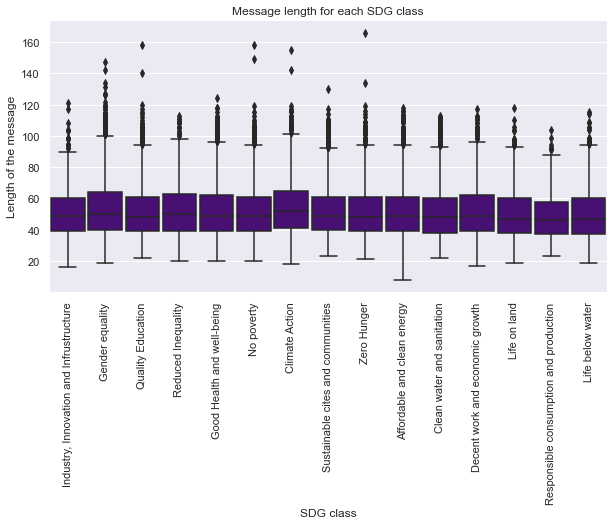

In [150]:
# Set the figure size and color palette for the boxplot
sns.set(rc={"figure.figsize": (10, 5)})
color = "indigo"

# Create a boxplot of the 'text_length' column for each SDG class
ax = sns.boxplot(x="SDG Labels", y="text_length", data=train, width=0.9, color=color)

# Set the axis labels and title
ax.set(xlabel="SDG class", ylabel="Length of the message")

# Rotate the x-tick labels to improve readability
plt.xticks(rotation=90)
plt.title("Message length for each SDG class")

# Show the plot
plt.show()


### Observations

>* The above display shows the __lenght__ of text for each __SDG Label__.
>* There is a significant disparity in SDG groups.
>* Only the upper  of the various SDGs have outliers.

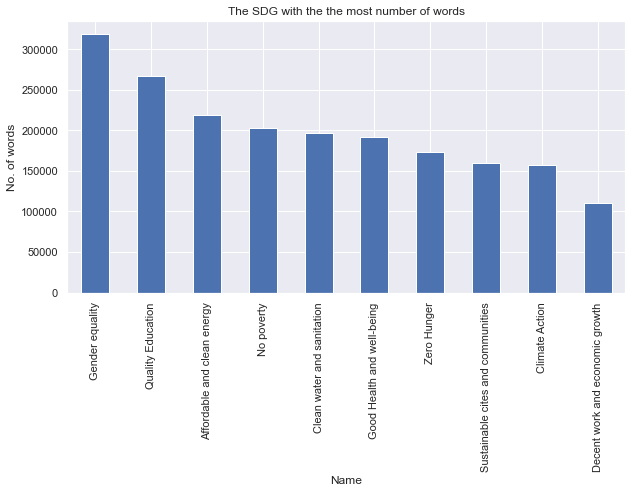

In [151]:
# Group the train DataFrame by the 'SDG_Labels' column and sum the values in the 'Num_Words' column
max_words = train.groupby("SDG Labels")["Num Words"].sum()

# Sort the max_words Series by the 'Num_Words' values in descending order
max_words = max_words.sort_values(ascending=False)

# Get the top 10 SDGs by number of words
top_10_sdgs = max_words.head(10)

# Plot a bar chart of the top 10 SDGs
top_10_sdgs.plot.bar(rot=90)
plt.xlabel("Name")
plt.ylabel("No. of words")
plt.title("The SDG with the the most number of words")
plt.show()


### Observations

>* This graphs gives a distribution of the content of each SDG by way of Number of words in each content related to an SDG
>* As we can see from the graph above **Gender equality** has the mosted worded content

## 3.5 <a id="class_balance"><strong>Class Balance</strong></a>
[Table of Contents](#contents)

### 3.5.1 <a id="class_balance"><strong>Working with balanced data</strong></a>
[Table of Contents](#contents)

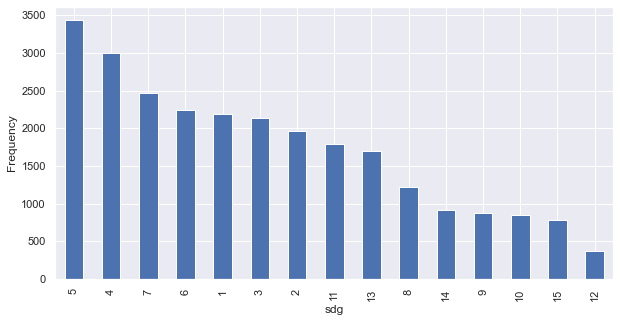

In [152]:
# Plot a bar chart of the distribution of the 'sdg' column in the train DataFrame
train["sdg"].value_counts().plot(kind="bar")
plt.ylabel("Frequency")
plt.xlabel("sdg")
plt.show()


The distribution plot above reveals that the class distribution is highly imbalanced, with wide variations in the frequency of each class. The most supported SDG is "Gender equality," represented by the label "5," while "Responsible consumption and production," represented by the label "12," has the least support. This indicates that there is a significant disparity in the level of attention and resources dedicated to different SDGs.

#### Dealing with data imbalance 

To deal with data imbalance and avoid bias predictions from the models we will build later on, we employed the resampling (Upsampling and Downsampling) method. 

In [153]:
# Convert the 'text' column in the train DataFrame from a list of words to a string of words separated by spaces
train["text"] = train["text"].apply(lambda x: " ".join([str(i) for i in x]))


In [154]:
# Convert the 'text' column in the test DataFrame from a list of words to a string of words separated by spaces
test["text"] = test["text"].apply(lambda x: " ".join([str(i) for i in x]))


dual-sampling:


,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id,Num Words,SDG Labels,text_length
14751,10.1787/729bf864-en,09e3c40de70f76a6473fa44714bd476b,lack readily identifiable realisable value ass...,8,0,3,1.0,14752,97,Decent work and economic growth,60


Class with their new resampled sizes


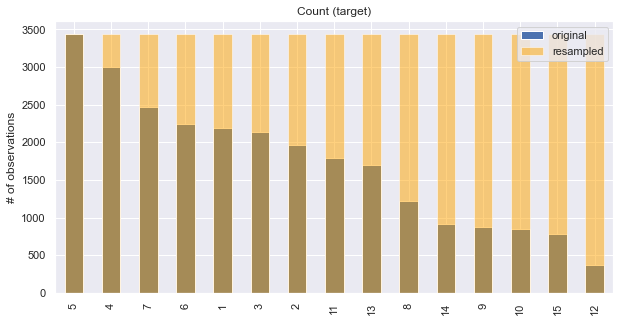

In [155]:
class_size = 3438 # setting an average or fixed size for each category in 'sdg'
dd = train.sdg.value_counts() # getting category name and their size
appended_data = [] # creating an empty list to append all category after resampling

# Creating a for-loop to resample and append to a list
for index, size in dd.items():
    if size < class_size: # setting condition to check if it's downsampling or otherwise
        temp_pd = resample(train[train['sdg']==index],
                          replace=True, # sample with replacement
                          n_samples=class_size, # match number in majority class
                          random_state=27)
    else:
        temp_pd = resample(train[train['sdg']==index],
                          replace=False, # sample with replacement (no need to duplicate observations)
                          n_samples=class_size, # match number in minority class
                          random_state=27)
# Appending each category after resampling
    appended_data.append(temp_pd)

# Creating a new dataframe and viewing
train_train_sampled = pd.concat(appended_data, axis=0)
print('dual-sampling:')
display(train_train_sampled.sample(1))
print('Class with their new resampled sizes')
# print(train_train_sampled.sdg.value_counts())

# ploting the old and new graph frequency
ax = train.sdg.value_counts().plot(kind='bar')
train_train_sampled.sdg.value_counts().plot(kind='bar', title='Count (target)', 
                                               ax=ax,color='orange', alpha=0.5)
plt.xticks(range(len(dd)),dd.index)
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

In [156]:
# # Working with resampled data
train = train_train_sampled

## 3.6 <a id="feature_engineering"><strong>Feature Engineering</strong></a>
[Table of Contents](#contents)

### 3.6.1 Vectorization

At this point,we are using **CountVectorizer** function to convert the cleaned text to numerical entries in a matrix form

In [157]:
from sklearn.feature_extraction.text import CountVectorizer

def convert_to_features(data, max_features=8000):
    """Converts the words in a dataset into features using a CountVectorizer.
    
    Parameters:
        data (pandas Series): A series containing the text data.
        max_features (int, optional): The maximum number of features to keep. Default is 8000.
        
    Returns:
        scipy sparse matrix: The feature matrix.
    """
    vectorizer = CountVectorizer(analyzer="word", max_features=max_features)
    features = vectorizer.fit_transform(data)
    return features

# Example usage
features = convert_to_features(train["text"])


we set the maximum feature to random number 8000 by discretion and to have a faster training of our model<br><br>

In [158]:
from scipy.sparse import csr_matrix

def transform_text_to_features(data, vectorizer):
    """Transforms text data into numerical features using a vectorizer.
    
    Parameters:
        data (pandas Series): A series containing the text data.
        vectorizer (CountVectorizer): The vectorizer to use for transforming the text data.
        
    Returns:
        numpy array: The feature matrix.
    """
    reviews_vect = vectorizer.fit_transform(data)
    features = reviews_vect.toarray()
    return features

vectorizer = CountVectorizer(analyzer="word", max_features=8000)
train_data_features = transform_text_to_features(train["text"], vectorizer)
print(f"Our new vectorized features have {train_data_features.shape[0]} rows and {train_data_features.shape[1]} features")


Our new vectorized features have 51570 rows and 8000 features


In [159]:
# Converting the word of the all text into features using 'vectorizer' object created earlier
reviews_vect_test = vectorizer.transform(test['text'])

In [160]:
# converting into a numpy array
test_data_features = reviews_vect_test.toarray() # for fast fitting of our dataset
test_data_features.shape # checking to be sure is the same size with our 'train' dataset

(6487, 8000)

In [161]:
#  Double checking our dataframe was modified rightly
test.sample(1)

,doi,text_id,text,labels_negative,labels_positive,agreement,id
3817,10.18356/0e7e4f09-en,5a8a677115283c2972e43987ab59d160,although value generated first sale fish produ...,0,9,1.0,3818


<a id="six"></a>
# 4 <a id="model"><strong>Classification Models</strong></a>
[Table of Contents](#contents)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Classification Models ⚡ |
| :--------------------------- |
| In this section, we'll look at different models, try to explain them, and learn about their benefits and drawbacks. |

---

*  Logistic Regression
*  Decision Tree Classifier
*  Naives Bayes
*  K-Neighbors Classifier




<a id="six"></a>
## 4.1 <a id="def_variables"><strong>Defining the Independent (X) and Dependent Variables (y)</strong></a>
[Table of Contents](#contents)

In [164]:
# Set the target variable to the 'sdg' column of the train dataframe
y = np.array(train['sdg'])

# Set the feature matrix to the train_data_features variable
X = train_data_features

### 4.1.1 Spliting into Train and validation set

Here, the train data set is divided into train and validation data set. The validation set size is 20% of the total records and it will be used in model evaluation.

In [165]:
# split the target ad features into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Splitting of the dataset into train and validation dataset, so that we can train and also see the performance of the model on unseen dataset

## 4.2 <a id="modelpreprocessing"><strong>Model Preprocessing</strong></a>
[Table of Contents](#contents)

### 4.2.1 Defining Function for Building Models

The function implements a machine learning moded with the use of the train_test_split concept. The function calculates various metrics to check for underfitting or overfitting and most importantly the performance of the model being executed.

In [167]:
sdgLables = {'No poverty': 1, 'Zero Hunger': 2, 'Good Health and well-being': 3, 'Quality Education': 4, 'Gender equality': 5, 'Clean water and sanitation': 6, 'Affordable and clean energy': 7, 'Industry, Innovation and Infrustructure': 9,
            'Decent work and economic growth': 8, 'Reduced Inequality': 10, 'Climate Action': 13, 'Sustainable cites and communities': 11, 'Responsible consumption and production': 12, 'life below water': 14, 'Life on land': 15}


In [168]:
# careating a function to fit the model and calculate various metrics
def modelling(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_test)
    
# calculating the metrics
    f1_train = f1_score(y_train, pred_train, average='weighted')
    f1_test = f1_score(y_test, pred_valid,  average='weighted')
    cm = confusion_matrix(y_test, pred_valid)
    # sdgLables = {v: k for k, v in sdgLables.items()}
    cr = classification_report(y_test, pred_valid, target_names=sdgLables, output_dict=True)
    
# creating a dataframe for 'confusion matrix' and 'classification report'
    cm_train = pd.DataFrame(cm, index = sdgLables, columns = sdgLables)
    cr_train = pd.DataFrame(cr)
    
    print('Confusion Matrix')
    display(cm_train)
    print('Classification Report')
    display(cr_train)
    
# plotting the confusion matrix using heatmap
    plt.figure(figsize=(10,5))
    sns.heatmap(cm_train, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print(f'Train accuracy(f1) is: {round(f1_train, 3)} and Validation accuracy(f1) is {round(f1_test, 3)}')
    return cm_train, cr_train, cm # returning metrics


## 4.3 <a id="buildingmodels"><strong>Building Models</strong></a>
[Table of Contents](#contents)


We will now apply the modelling function so as to build our classification models.

### 4.3.1 <a id="lrc"><strong>Logistic Regression Classifier</strong></a>
[Table of Contents](#contents)

Logistics regression is a predictive analytics model that is used to describe data and explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.Sometimes, it can also be applied to a dependent variable that is multi-classed (ie have more than 2 variables). The model was adopted because it is a classification algorithm and suited our use case as well.

In [171]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model instance
lm = LogisticRegression(C=2, solver='liblinear')

# fitting and predictiion by calling the 'modelling' fuction 
cm_train_logit, cr_train_logit, cm_logit = modelling(lm)

NameError: name 'f1_score' is not defined

From the confusion matrix we can see that the model did well at predicting the `Gender equality`. Therefore, we have more correctly predicted `Gender equality` sdg than others with an accuracy of `92%`

* Generally the model is overfitting having an accuracy score of `99%` in training vs `92%` while predicting unseen dataset


In [110]:
# Create dictionaries for the data we want to log on comet

# Dictionary of model parameters
params = {
    "random_state": 10,  # Random state for reproducibility
    "model_type": "lm"  # Model type
}

# Dictionary of evaluation metrics
metrics = {
    "f1": cr_train_logit.loc['f1-score', 'weighted avg'],  # F1 score
    "precision": cr_train_logit.loc['precision', 'weighted avg'],  # Precision
    "recall": cr_train_logit.loc['recall', 'weighted avg']  # Recall
}


In [111]:
# Log our parameters and results on comet
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(matrix=cm_logit)

{'web': 'https://www.comet.com/api/asset/download?assetId=3dd974e07f9d403ab7c1d262351dca1e&experimentKey=099c5b2182ab4eec8102611621d21267',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=3dd974e07f9d403ab7c1d262351dca1e&experimentKey=099c5b2182ab4eec8102611621d21267',
 'assetId': '3dd974e07f9d403ab7c1d262351dca1e'}

### 4.3.2 <a id="dtc"><strong>Decision Tree Classifier</strong></a>
[Table of Contents](#contents)

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. In order to make prediction, the algorithm simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees till it get to the final outcome.

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


#Inintiate Decision tree
dt=DecisionTreeClassifier(random_state=1)

#initiate a BaggingClassifier called bc consisting of 50 trees
bc=BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1, n_jobs=-1)

In [178]:
cm_train_dt, cr_train_dt, cm_dt = modelling(dt)

From our result, the model performed poorly on unseen data. With the train data, an accuracy score of `100%` was recorded but on the test data, we have an accuracy score of `88.9%` which depicts overfitting. 

### Using pipeline

Moving forward to build the rest of our model, we employed techiques like `Pipeline` and `GridsearchCV`.

**Pipeline**

A machine learning pipeline is useful for coordinating the input and output of data into a machine learning model. A machine learning pipeline is an entire system that coordinates the input of data into and output from a machine learning model (or set of multiple models). Raw data input, features, outputs, machine learning model and model parameters, and prediction outputs are all covered.

Here, a machine learning pipeline is employed to easy feature extraction from our text data. The pipeline employed executes the following steps in chronological order to extract these features and make predictions. 
They include:

* Count Vectorization: The CountVectorizer tool in Scikit-learn is used to turn a group of text documents into a vector of term/token counts. Additionally, it enables text data to be pre-processed before being turned into a vector form. Its capabilities turn it into a very versatile feature representation module for text.
&emsp;


* TF-ID Transformer: With TF-ID transformer, a count matrix is transformed into a normalised tf or tf-itrain representation. To reduce the impact of tokens that appear often in a corpus, tf-itrain is used in place of the raw frequencies of occurrence of a token in a specific document 



* Model: This represents the adopted Machine Learning model


**GridsearchCV**

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. The performance of a model significantly depends on the value of hyperparameters and there is no way to know in advance the best values for hyperparameters. So ideally, we need to try all possible values to know the optimal values. That is why we employ GridSearchCV to automate the tuning of hyperparameters.

### 4.3.3 <a id="nbc"><strong>Naive Bayes Classifier</strong></a>
[Table of Contents](#contents)

Mostly employed in Natural Language Processing, the Multinomial Naive Bayes algorithm is a probabilistic learning technique (NLP). The method, which guesses the tag of a text such as an email or newspaper article, is based on the Bayes theorem. For a given sample, it determines the probabilities of each tag, and then outputs the tag with the highest probability.

The Naive Bayes classifier is a collection of many methods, all of which are based on the idea that each feature being classified is independent of every other feature. The existence or absence of one feature has no bearing on the other feature's existence or absence

In [179]:
# split the target and features into train and test
x_train, x_valid, y_train, y_valid = train_test_split(train['text'], train.sdg, test_size=0.3, random_state=10)

Here, we split our dataset again into `Train` and `Validation` set for the purpose of fitting the data into our pipeline

##### Building a pipeline to be more concise

In [180]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_validate
import pandas as pd

# Create the pipeline with CountVectorizer, TfidfTransformer, and MultinomialNB
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Use cross validation to evaluate the model
scores = cross_validate(text_clf, train['text'], train.sdg, return_train_score=True)

# Display the scores in a DataFrame
pd.DataFrame(scores)


,fit_time,score_time,test_score,train_score
0,3.379314,0.677657,0.828195,0.864408
1,2.971035,0.622963,0.826062,0.860117
2,2.835997,0.550250,0.819760,0.863268
3,2.498003,0.783999,0.818402,0.863438
4,2.359995,0.599002,0.816172,0.864068


The model seem to be under performing and overfitting at the same time
- Using GridsearchCV we can find the best hyper-parameters

In [181]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the parameter grid for the grid search
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'clf__alpha': (1e-2, 1e-3),
    'clf__fit_prior': (True, False)
}

# Create the grid search object and fit it to the data
nb_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
nb_clf.fit(x_train, y_train)

# Print the best accuracy and the best parameters
print('The best accuracy is:', nb_clf.best_score_)
print(nb_clf.best_params_)

# Make predictions on the validation set
predicts = nb_clf.predict(x_valid)

# Display the confusion matrix
cm = confusion_matrix(y_valid, predicts)
pd.DataFrame(cm, index=sdgLables, columns=sdgLables)


The best accuracy is: 0.9259536564598114
{'clf__alpha': 0.01, 'clf__fit_prior': True, 'vect__ngram_range': (1, 2)}


,No poverty,Zero Hunger,Good Health and well-being,Quality Education,Gender equality,Clean water and sanitation,Affordable and clean energy,"Industry, Innovation and Infrustructure",Decent work and economic growth,Reduced Inequality,Climate Action,Sustainable cites and communities,Responsible consumption and production,life below water,Life on land
No poverty,866,11,3,7,44,1,4,11,2,16,6,0,2,0,0
Zero Hunger,26,937,1,4,1,14,7,0,3,6,4,0,11,3,3
Good Health and well-being,6,0,986,3,12,2,0,1,1,1,3,0,2,0,0
Quality Education,13,0,1,975,18,2,3,14,2,6,4,1,2,2,0
Gender equality,44,8,17,20,897,3,7,22,5,14,4,1,8,0,0
Clean water and sanitation,4,16,0,4,11,939,16,0,3,1,12,2,16,2,9
Affordable and clean energy,4,5,0,7,5,16,950,1,6,1,10,2,10,0,4
"Industry, Innovation and Infrustructure",4,6,4,8,23,0,5,972,6,4,6,0,0,0,2
Decent work and economic growth,1,10,2,0,0,4,7,1,1059,0,3,0,2,0,0
Reduced Inequality,6,1,1,2,2,0,2,5,3,1017,0,0,0,0,0


Using our split dataset so we can train on seen data and validate our model with the unseen dataset

In [182]:
# Create dictionaries for the data we want to log
params = nb_clf.best_params_
metrics = {"f1": nb_clf.best_score_}

# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(matrix=cm)

{'web': 'https://www.comet.com/api/asset/download?assetId=0bbc10f86a174873a2890ce51b981de0&experimentKey=e410174bfb454c9fbfc9709993a5ec85',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=0bbc10f86a174873a2890ce51b981de0&experimentKey=e410174bfb454c9fbfc9709993a5ec85',
 'assetId': '0bbc10f86a174873a2890ce51b981de0'}

### 4.3.4 <a id="knc"><strong>K-Neighbors Classifier</strong></a>
[Table of Contents](#contents)

Building a pipeline to be more concise

<script src="https://github.com/kojosbk/RentingProject/blob/main/rent_in_Ghana%20copy.ipynb"></script>

In [183]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_validate
import pandas as pd

# Create the pipeline with CountVectorizer, TfidfTransformer, and KNeighborsClassifier
knc_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfitrain', TfidfTransformer()),
    ('clf', KNeighborsClassifier()),
])

# Use cross validation to evaluate the model
scores = cross_validate(knc_clf, train['text'], train.sdg, return_train_score=True)

# Display the scores in a DataFrame
pd.DataFrame(scores)


,fit_time,score_time,test_score,train_score
0,2.948859,23.962734,0.817627,0.895676
1,2.368773,23.432563,0.821505,0.894609
2,2.386037,21.505371,0.823250,0.891919
3,2.461779,22.023122,0.817627,0.894924
4,2.373981,21.862202,0.801532,0.892646


The model seem to be under performing and overfitting at the same time
- Using GridsearchCV we can find the best hyper-parameters

In [184]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the parameter grid for the grid search
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__n_neighbors': (1, 31)
}

# Create the grid search object and fit it to the data
knn_clf = GridSearchCV(knc_clf, parameters, n_jobs=-1)
knn_clf.fit(x_train, y_train)

# Print the best accuracy and the best parameters
print(f'The best accuracy is: {knn_clf.best_score_}')
print(knn_clf.best_params_)

# Make predictions on the validation set
predicts = knn_clf.predict(x_valid)

# Display the confusion matrix
cm = confusion_matrix(y_valid, predicts)
pd.DataFrame(cm, index=sdgLables, columns=sdgLables)


The best accuracy is: 0.8965345028642867
{'clf__n_neighbors': 1, 'vect__ngram_range': (1, 1)}


,No poverty,Zero Hunger,Good Health and well-being,Quality Education,Gender equality,Clean water and sanitation,Affordable and clean energy,"Industry, Innovation and Infrustructure",Decent work and economic growth,Reduced Inequality,Climate Action,Sustainable cites and communities,Responsible consumption and production,life below water,Life on land
No poverty,851,12,5,12,42,1,7,13,1,15,5,0,5,0,4
Zero Hunger,14,913,9,0,8,15,5,9,9,6,2,0,15,9,6
Good Health and well-being,17,7,956,7,5,0,3,7,0,3,4,0,4,1,3
Quality Education,8,3,7,936,24,5,4,17,13,6,4,5,7,2,2
Gender equality,50,18,28,32,798,5,8,44,11,23,7,0,16,2,8
Clean water and sanitation,8,15,4,5,7,921,23,5,5,1,8,1,11,5,16
Affordable and clean energy,5,19,2,10,7,9,911,6,7,8,13,1,15,3,5
"Industry, Innovation and Infrustructure",7,1,11,5,20,2,2,968,3,8,4,3,1,2,3
Decent work and economic growth,2,11,0,0,3,4,9,0,1044,2,5,3,6,0,0
Reduced Inequality,5,0,0,5,4,0,2,8,0,1011,0,0,4,0,0


In [185]:
# Create dictionaries for the data we want to log

params = knn_clf.best_params_
metrics = {"f1": knn_clf.best_score_}

# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(matrix=cm)

{'web': 'https://www.comet.com/api/asset/download?assetId=77455e4a85094e18b9a3d67f449f96a6&experimentKey=e410174bfb454c9fbfc9709993a5ec85',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=77455e4a85094e18b9a3d67f449f96a6&experimentKey=e410174bfb454c9fbfc9709993a5ec85',
 'assetId': '77455e4a85094e18b9a3d67f449f96a6'}

The above cells are used to log/commit our model to comet 

## 4.4 <a id="modelperformance"><strong>Model Performance</strong></a>
[Table of Contents](#contents)

In order to evaluate how well our models have performed, we employed the following classification metrics:

* **1. Accuracy**

Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.

* **2. Precision**

Precision explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where False Positive is a higher concern than False Negatives.

* **3. Recall**

Recall explains how many of the actual positive cases we were able to predict correctly with our model. It is a useful metric in cases where False Negative is of higher concern than False Positive.

* **4. F1-Score**

It gives a combined idea about Precision and Recall metrics.F1 Score is the harmonic mean of precision and recall.

In [186]:
from sklearn import metrics

In [187]:
# Make predictions with each model
lm_preds = lm.predict(X_test) # LogisticRegression
nb_clf_preds = nb_clf.predict(x_valid) # Naive Bayes
knn_clf_preds = knn_clf.predict(x_valid) # K-Neighbors Classifier
dt_preds = dt.predict(X_test) # Decision Tree Classifier


In [188]:
# Create a mapping of models to their prediction arrays
metrics_dict = {
    "LogisticRegression": lm_preds, 
    "Naive Bayes": nb_clf_preds, 
    "K-Neighbors Classifier": knn_clf_preds,
    "Decision Tree Classifier": dt_preds
}

# Initialize a list to store the metrics temporarily
metrics_list = []


In [189]:
from sklearn import metrics
import pandas as pd

# Initialize a list to store the metrics temporarily
metrics_list = []

# Iterate through the dictionary to calculate the metrics for each model
for name, prediction in metrics_dict.items():
    f1_score = metrics.f1_score(y_valid, prediction, average="weighted")  
    precision = metrics.precision_score(y_valid, prediction, average="weighted")
    recall = metrics.recall_score(y_valid, prediction, average="weighted")
    metrics_list.append([name, f1_score, precision, recall])

# Create a DataFrame from the metrics list
perf_train = pd.DataFrame(metrics_list, columns=["Classifier", "F1_score", "Precision", "Recall"])

# Set the index to the Classifier column
perf_train.set_index("Classifier", inplace=True)


In [190]:
# Sort the DataFrame by the F1_score column in descending order
perf_train = perf_train.sort_values(by=['F1_score'], ascending=False)

# Display the DataFrame
perf_train


,F1_score,Precision,Recall
Classifier,,,
Naive Bayes,0.940392,0.940426,0.940469
LogisticRegression,0.924470,0.924481,0.924956
K-Neighbors Classifier,0.920602,0.920719,0.921207
Decision Tree Classifier,0.889392,0.889529,0.890828


<AxesSubplot:xlabel='Classifier'>

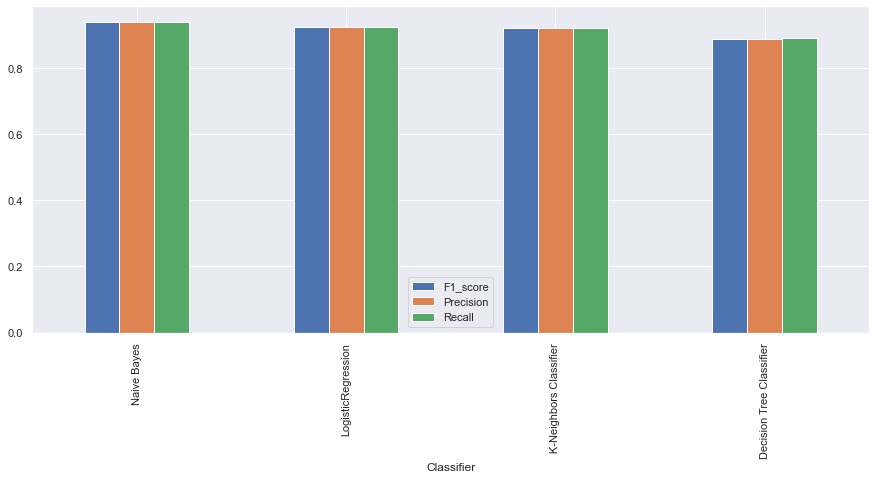

In [191]:
# Plot the metrics in a bar chart
perf_train.plot(kind="bar", figsize=(15, 6))


All the Classification metrics point to `Naive Bayes` as the better Model


#### predicting our `test` DataSet with the best model

In [192]:
# Make predictions on the test set using the fitted Naive Bayes model
pred_test = nb_clf.predict(test['text'])


In [193]:
# Save the test predictions to a CSV file
output = pd.DataFrame({'id': test.id, 'sdg': pred_test})
output.to_csv('Team A1.csv', index=False)


In [194]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/kojosbk/sustainable-development-goals-sdgs-classifier/e410174bfb454c9fbfc9709993a5ec85
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     f1 [2] : (0.8965345028642867, 0.9259536564598114)
COMET INFO:   Parameters:
COMET INFO:     clf__alpha        : 0.01
COMET INFO:     clf__fit_prior    : True
COMET INFO:     clf__n_neighbors  : 1
COMET INFO:     vect__ngram_range : (1, 1)
COMET INFO:   Uploads:
COMET INFO:     confusion-matrix         : 2
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1.32 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_c

# 5.0 <a id="Conclusion/Recommendation"><strong>CONCLUSION AND RECOMMENDATION</strong></a>
[Table of Contents](#contents)

In this project, the team created a Multi-label text classification Machine Learning Model to enhance text labeling, which will save time for UN and UNEP experts and increase the effectiveness of labeling documents to related SDGs, particularly for fields that are outside the experts' purview and may be overlooked.

- SDG monitoring is necessary to track progress and identify barriers to achieving common goals.

## 5.1 <a id="Conclusion"><strong>Conclusion</strong></a>
[Table of Contents](#contents)
- The UN should think about asking governments, academic institutions, private, and public entities to conduct more research and write more documents on SDGs with very little text in order to improve the success and progress of those SDGs with low focus. This is because achieving high levels of attention in some goals while having less in others is not ideal.

## 5.2 <a id="Recommendation"><strong>Recommendation</strong></a>
[Table of Contents](#contents)

- The UN should think about asking governments, academic institutions, private, and public entities to conduct more research and write more documents on SDGs with very little text in order to improve the success and progress of those SDGs with low focus. This is because achieving high levels of attention in some goals while having less in others is not ideal.

# 6.0 <a id="reference"><strong>REFERENCES</strong></a>
[Table of Contents](#contents)